In [1]:
#KNN

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('mydata/data_cleaned.csv')
data.shape

(891, 25)

In [4]:
data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [5]:
x = data.drop(['Survived'], axis = 1)
y = data['Survived']
x.shape, y.shape

((891, 24), (891,))

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [7]:
x = pd.DataFrame(x_scaled, columns = x.columns)
x.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0.271174,0.014151,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.472229,0.139136,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.321438,0.015469,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.434531,0.103644,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.434531,0.015713,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [8]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state = 56, stratify = y)

In [9]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score

In [10]:
clf = KNN(n_neighbors = 10, metric = 'euclidean')

clf.fit(train_x, train_y)

test_predict = clf.predict(test_x)
k_1 = f1_score(test_predict, test_y)

In [11]:
#Elbow (Dirsek) Method
def Elbow(K):
    
    test_error = []
    
    for i in K:
        clf = KNN(n_neighbors = i)
        clf.fit(train_x, train_y)
        tmp = clf.predict(test_x)
        tmp = f1_score(tmp, test_y)
        error = 1 - tmp
        test_error.append(error)
    
    return test_error

In [12]:
k = range(6, 30, 2)

In [13]:
test = Elbow(k)

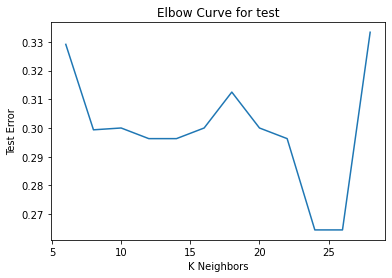

In [14]:
plt.plot(k, test)
plt.xlabel('K Neighbors')
plt.ylabel('Test Error')
plt.title('Elbow Curve for test')
plt.show()

In [16]:
#K = 27
clf = KNN(n_neighbors = 27, metric = 'euclidean')

clf.fit(train_x, train_y)

test_predict = clf.predict(test_x)
k_2 = f1_score(test_predict, test_y)

In [18]:
print('Dirsek öncesi Knn Score :', k_1)
print('Dirsek sonrası Knn Score :', k_2)

Dirsek öncesi Knn Score : 0.7000000000000001
Dirsek sonrası Knn Score : 0.751592356687898


In [ ]:
#Naive Bayes -> Multinomial Nb, Bernoulli Nb, Gaussian Nb.